We start with a worked example.

Given $\mathcal{N}(0, 1)$, we want to find the probability of a particular event. Let's plot the original distribution $p$:

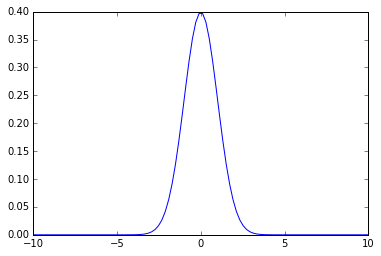

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

p = stats.norm(0, 1)

x = np.linspace(-10, 10, 100)
plt.plot(x, p.pdf(x));

Now, let's say we want to find the cumulative probability of P(X >= 3). We can visualize that with a vertical bar at X = 3:

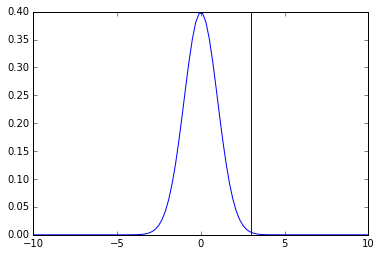

In [2]:
x = np.linspace(-10, 10, 100)
plt.axvline(x=3, ymin=0, ymax=1)
plt.plot(x, p.pdf(x));

Using (almost) exact computation, we can compute the true value:

In [3]:
h_true = 1 - p.cdf(3)
print(h_true)

0.00134989803163


Now, using Monte Carlo integration, we can approximate this integral:

In [23]:
n = 1000000
y = p.rvs(n)
h_mc = np.sum(y > 3) / n
# estimate and relative error
h_mc, np.abs(h_mc - h_true)/h_true

(0.0013129999999999999, 0.027333939872144556)

Woops! That's the wrong result! Execute the above with enough samples to approximate the true value:

We can see that in general it is onerous to sample from this random variable because we throw the majority of our samples away!

Qualitatively, how many samples do we throw away?

Now let's use Importance Sampling.

Recall that the idea of importance sampling is to posit an approximating distribution $q$ to use instead of sampling from $p$. We then weight these samples to get a useful approximation.

For example, let's create an approximating distribution $q \sim \mathcal{U}(3, 5)$

Note that we picked the ranges of $q$ to have meaningful overlap in the area we care about.

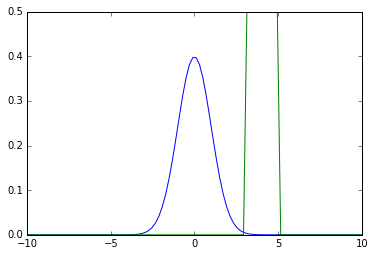

In [20]:
# visualize
x = np.linspace(-10, 10, 100)
plt.plot(x, p.pdf(x));
plt.plot(x, stats.uniform(3, 2).pdf(x));

See how the uniform distribution covers the area we are concerned with?

Now, let's compute with it.

First, we define $q$.

In [24]:
q = stats.uniform(3, 2)

Then, we sample from it and reweight according to the probabilities in $q$ and $p$:

In [16]:
samples = q.rvs(100)

w = p.pdf(samples) / q.pdf(samples)
h_is = np.sum(w) / n

# estimate and relative error
h_is, np.abs(h_is - h_true)/h_true

(0.0014277538743735873, 0.057675350966670487)

Now it's your turn.

Repeat the above experiment with one larger uniform distribution and one smaller uniform distribution. Show both the estimate and the error.

Repeat the above experiment using a standard normal distribution to approximate the uniform distribution over the following intervals: [-3, 3], [-2, 2], [-1, 1].

Can you offer any rules of thumb to choose $q$?